# Laptop Price Prediction 

# Project Overview
SmartTech Co. is a company that aims to stay competitive in the expanding laptop market by accurately pricing its products.
The company has partnered with a data science team to develop a machine learning model that predicts laptop prices based on 
various features such as RAM, storage, processor type, and brand. 
This pricing model helps SmartTech Co. strategically position its laptops, understand the impact of brand reputation on pricing, 
The goal is to enhance market positioning and ensure competitive pricing in a rapidly evolving industry.

# Clients Objectives
#Accurate Pricing: 
Develop a model that can accurately predict laptop prices based on various features, 
helping our clients stay competitive in the market.

#Market Positioning :
how different features contribute to pricing, enabling SmartTech Co. to strategically position its laptops in the market.

#Brand Influence: 
Assess the impact of brand reputation on pricing, providing insights into brand perception and market demand.

# #Importing Libraries

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Understanding The Data

In [18]:
df=pd.read_csv('laptop.csv')
df.head()

,Unnamed: 0.1,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,0.0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,1.0,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,2.0,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,3.0,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,4.0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


# The DataSet Contains 1303 rows & 12 columns.

In [19]:
df.shape

(1303, 13)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0.1      1303 non-null   int64  
 1   Unnamed: 0        1273 non-null   float64
 2   Company           1273 non-null   object 
 3   TypeName          1273 non-null   object 
 4   Inches            1273 non-null   object 
 5   ScreenResolution  1273 non-null   object 
 6   Cpu               1273 non-null   object 
 7   Ram               1273 non-null   object 
 8   Memory            1273 non-null   object 
 9   Gpu               1273 non-null   object 
 10  OpSys             1273 non-null   object 
 11  Weight            1273 non-null   object 
 12  Price             1273 non-null   float64
dtypes: float64(2), int64(1), object(10)
memory usage: 132.5+ KB


# here, we can see that the Columns - Ram, Memory & Weight have data type of Object we will convert to numeric data type in cleaning process.

# checking duplicates

In [21]:
df.duplicated().sum()

0

In [22]:
df.isnull().sum()

Unnamed: 0.1         0
Unnamed: 0          30
Company             30
TypeName            30
Inches              30
ScreenResolution    30
Cpu                 30
Ram                 30
Memory              30
Gpu                 30
OpSys               30
Weight              30
Price               30
dtype: int64

## droping nullvalues

In [23]:
df.dropna(inplace=True)

In [24]:
df.isnull().sum()

Unnamed: 0.1        0
Unnamed: 0          0
Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

# Cleaning & Preprcessing

In [25]:
df.drop(columns=["Unnamed: 0.1","Unnamed: 0"],inplace=True)

In [26]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1273 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1273 non-null   object 
 1   TypeName          1273 non-null   object 
 2   Inches            1273 non-null   object 
 3   ScreenResolution  1273 non-null   object 
 4   Cpu               1273 non-null   object 
 5   Ram               1273 non-null   object 
 6   Memory            1273 non-null   object 
 7   Gpu               1273 non-null   object 
 8   OpSys             1273 non-null   object 
 9   Weight            1273 non-null   object 
 10  Price             1273 non-null   float64
dtypes: float64(1), object(10)
memory usage: 119.3+ KB


# Feature Engineering

## In memory column it have many different disk sapce categories fetching only hdd and ssd form memory column and storing it in a new column.

# memory column

In [28]:
df["Memory"].value_counts()

Memory
256GB SSD                        401
1TB HDD                          217
500GB HDD                        130
512GB SSD                        116
128GB SSD +  1TB HDD              92
128GB SSD                         74
256GB SSD +  1TB HDD              71
32GB Flash Storage                37
2TB HDD                           16
64GB Flash Storage                14
512GB SSD +  1TB HDD              14
1TB SSD                           13
256GB SSD +  2TB HDD              10
1.0TB Hybrid                       9
256GB Flash Storage                8
16GB Flash Storage                 7
32GB SSD                           6
180GB SSD                          4
128GB Flash Storage                4
512GB SSD +  2TB HDD               3
16GB SSD                           3
512GB Flash Storage                2
1TB SSD +  1TB HDD                 2
128GB SSD +  2TB HDD               2
256GB SSD +  500GB HDD             2
256GB SSD +  256GB SSD             2
512GB SSD +  256GB SSD         

In [ ]:
#Replacing GB to ''(null or empty)
#Replacing TB to 000 (1TB = 1000GB)

In [29]:
df['Memory'] = df['Memory'].astype(str).replace('\.0', '', regex=True)
df["Memory"] = df["Memory"].str.replace('GB', '', regex=False)
df["Memory"] = df["Memory"].str.replace('TB', '000', regex=False)

# Split the 'Memory' column into two parts (before and after the "+")
new = df["Memory"].str.split("+", n=1, expand=True)

# Clean the first part
df["first"] = new[0].str.strip()

# Clean the second part, if any
df["second"] = new[1].fillna("0").str.strip()

# Create flags for different types of storage
df["Layer1HDD"] = df["first"].apply(lambda x: 1 if "HDD" in x else 0)
df["Layer1SSD"] = df["first"].apply(lambda x: 1 if "SSD" in x else 0)
df["Layer1Hybrid"] = df["first"].apply(lambda x: 1 if "Hybrid" in x else 0)
df["Layer1Flash_Storage"] = df["first"].apply(lambda x: 1 if "Flash Storage" in x else 0)
df['first'] = df['first'].str.replace(r'\D', '', regex=True)

df["Layer2HDD"] = df["second"].apply(lambda x: 1 if "HDD" in x else 0)
df["Layer2SSD"] = df["second"].apply(lambda x: 1 if "SSD" in x else 0)
df["Layer2Hybrid"] = df["second"].apply(lambda x: 1 if "Hybrid" in x else 0)
df["Layer2Flash_Storage"] = df["second"].apply(lambda x: 1 if "Flash Storage" in x else 0)
df['second'] = df['second'].str.replace(r'\D', '', regex=True)

# Replace empty strings with zeros before converting to integers
df['first'] = df['first'].replace('', '0')
df['second'] = df['second'].replace('', '0')

# Convert to integers
df["first"] = df["first"].astype(int)
df["second"] = df["second"].astype(int)

# Calculate the actual storage capacities
df["HDD"] = (df["first"] * df["Layer1HDD"] + df["second"] * df["Layer2HDD"])
df["SSD"] = (df["first"] * df["Layer1SSD"] + df["second"] * df["Layer2SSD"])
df["Hybrid"] = (df["first"] * df["Layer1Hybrid"] + df["second"] * df["Layer2Hybrid"])
df["Flash_Storage"] = (df["first"] * df["Layer1Flash_Storage"] + df["second"] * df["Layer2Flash_Storage"])

# Drop the intermediate columns
df.drop(columns=['first', 'second', 'Layer1HDD', 'Layer1SSD', 'Layer1Hybrid',
       'Layer1Flash_Storage', 'Layer2HDD', 'Layer2SSD', 'Layer2Hybrid',
       'Layer2Flash_Storage'], inplace=True)

In [30]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,HDD,SSD,Hybrid,Flash_Storage
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832,0,128,0,0
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232,0,0,0,128
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256 SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000,0,256,0,0
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512 SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360,0,512,0,0
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080,0,256,0,0


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1273 entries, 0 to 1302
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1273 non-null   object 
 1   TypeName          1273 non-null   object 
 2   Inches            1273 non-null   object 
 3   ScreenResolution  1273 non-null   object 
 4   Cpu               1273 non-null   object 
 5   Ram               1273 non-null   object 
 6   Memory            1273 non-null   object 
 7   Gpu               1273 non-null   object 
 8   OpSys             1273 non-null   object 
 9   Weight            1273 non-null   object 
 10  Price             1273 non-null   float64
 11  HDD               1273 non-null   int64  
 12  SSD               1273 non-null   int64  
 13  Hybrid            1273 non-null   int64  
 14  Flash_Storage     1273 non-null   int64  
dtypes: float64(1), int64(4), object(10)
memory usage: 159.1+ KB


# inches column

In [32]:
# Find rows where the 'Weight' column contains '?'
rows_with_question_mark = df[df["Inches"] == '?']

# Display the rows
print(rows_with_question_mark)
df["Inches"]=df["Inches"].replace("?","15.6")

df["Inches"]=df["Inches"].astype("float64")

    Company     TypeName Inches   ScreenResolution  \
476    Dell  Workstation      ?  Full HD 1920x1080   

                             Cpu  Ram   Memory                  Gpu  \
476  Intel Core i7 7700HQ 2.8GHz  8GB  256 SSD  Nvidia Quadro M1200   

          OpSys  Weight      Price  HDD  SSD  Hybrid  Flash_Storage  
476  Windows 10  1.78kg  128298.24    0  256       0              0  


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1273 entries, 0 to 1302
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1273 non-null   object 
 1   TypeName          1273 non-null   object 
 2   Inches            1273 non-null   float64
 3   ScreenResolution  1273 non-null   object 
 4   Cpu               1273 non-null   object 
 5   Ram               1273 non-null   object 
 6   Memory            1273 non-null   object 
 7   Gpu               1273 non-null   object 
 8   OpSys             1273 non-null   object 
 9   Weight            1273 non-null   object 
 10  Price             1273 non-null   float64
 11  HDD               1273 non-null   int64  
 12  SSD               1273 non-null   int64  
 13  Hybrid            1273 non-null   int64  
 14  Flash_Storage     1273 non-null   int64  
dtypes: float64(2), int64(4), object(9)
memory usage: 159.1+ KB


<Axes: xlabel='Inches', ylabel='Density'>

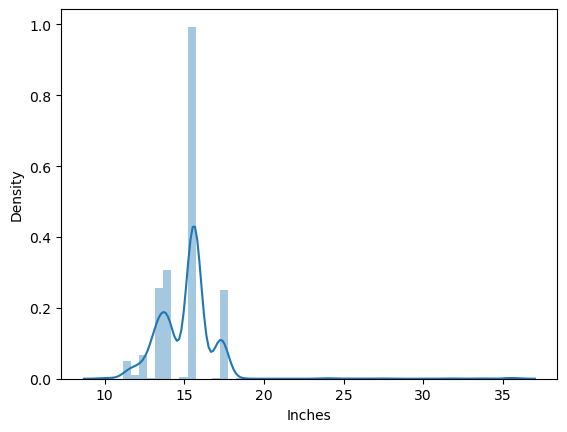

In [34]:
sns.distplot(df['Inches'])

<Axes: xlabel='Inches', ylabel='Price'>

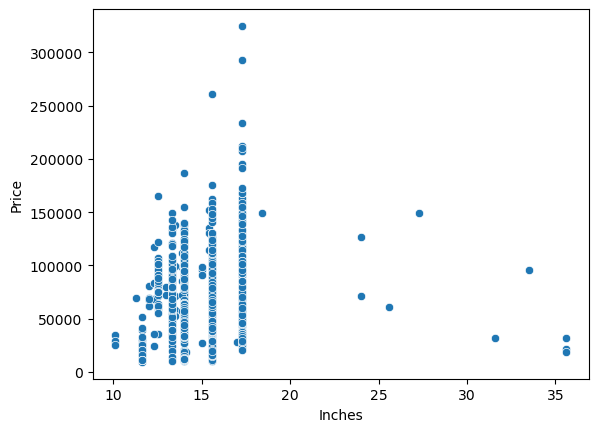

In [35]:
sns.scatterplot(x=df['Inches'],y=df['Price'])

In [ ]:
#Screen size (inches) is not a significant feature for predicting laptop prices, as it shows no strong correlation with price.

# Ram and Weight columns

In [ ]:
# Removing the GB string form Ram column
# Removing the KG string form weight column

In [36]:
df['Ram'] = df['Ram'].str.replace('GB','')
df['Weight'] = df['Weight'].str.replace('kg','')

In [37]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,HDD,SSD,Hybrid,Flash_Storage
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,128,0,0
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,0,128
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256 SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,256,0,0
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,512,0,0
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,256,0,0


In [38]:
# Find rows where the 'Weight' column contains '?'
rows_with_question_mark = df[df["Weight"] == '?']

# Display the rows
print(rows_with_question_mark)
df["Weight"]=df["Weight"].replace("?","1.6")
df["Ram"]=df["Ram"].astype("int32")
df["Weight"]=df["Weight"].astype("float64")

    Company   TypeName  Inches   ScreenResolution                         Cpu  \
208    Dell  Ultrabook    13.3  Full HD 1920x1080  Intel Core i7 8550U 1.8GHz   

    Ram   Memory                     Gpu       OpSys Weight     Price  HDD  \
208   8  256 SSD  Intel UHD Graphics 620  Windows 10      ?  77202.72    0   

     SSD  Hybrid  Flash_Storage  
208  256       0              0  


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1273 entries, 0 to 1302
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1273 non-null   object 
 1   TypeName          1273 non-null   object 
 2   Inches            1273 non-null   float64
 3   ScreenResolution  1273 non-null   object 
 4   Cpu               1273 non-null   object 
 5   Ram               1273 non-null   int32  
 6   Memory            1273 non-null   object 
 7   Gpu               1273 non-null   object 
 8   OpSys             1273 non-null   object 
 9   Weight            1273 non-null   float64
 10  Price             1273 non-null   float64
 11  HDD               1273 non-null   int64  
 12  SSD               1273 non-null   int64  
 13  Hybrid            1273 non-null   int64  
 14  Flash_Storage     1273 non-null   int64  
dtypes: float64(3), int32(1), int64(4), object(7)
memory usage: 154.2+ KB


<Axes: xlabel='Ram'>

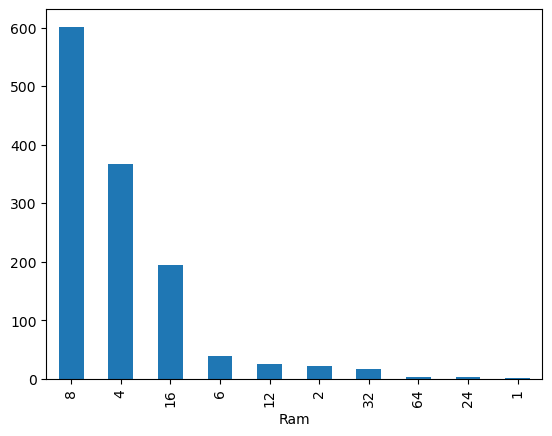

In [40]:
df['Ram'].value_counts().plot(kind='bar')

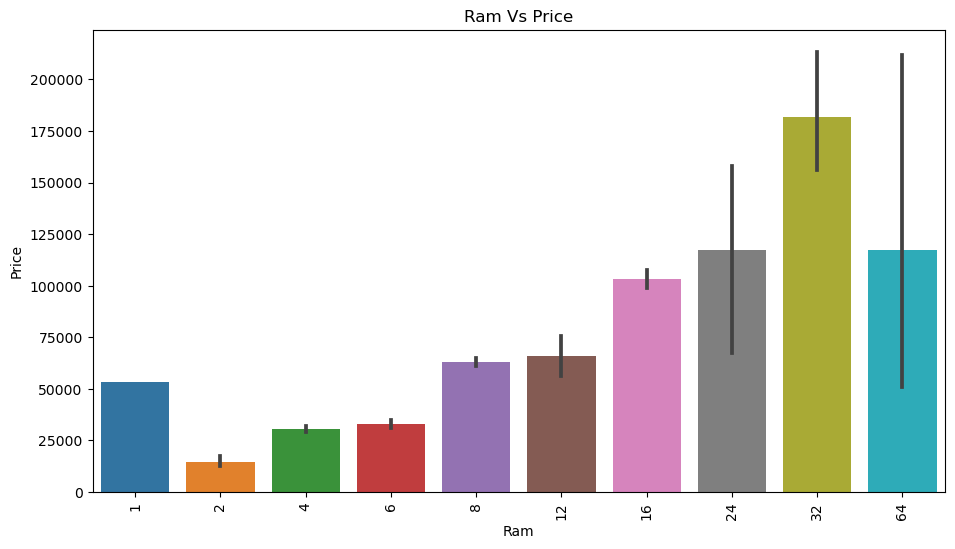

In [41]:

plt.figure(figsize = (11,6))
sns.barplot(x=df['Ram'],y=df['Price'])
plt.xticks(rotation = 'vertical')
plt.title('Ram Vs Price')
plt.show()

<Axes: xlabel='Weight', ylabel='Density'>

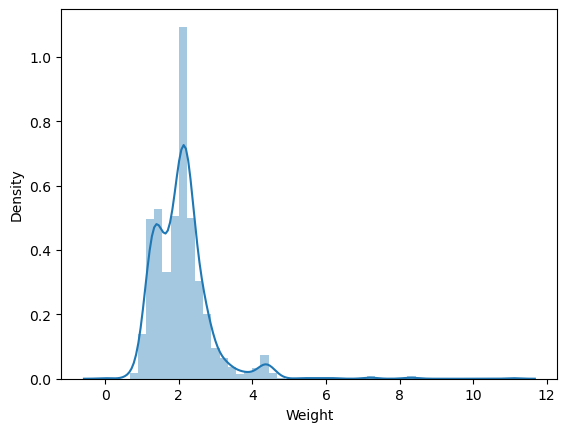

In [42]:
sns.distplot(df['Weight'])

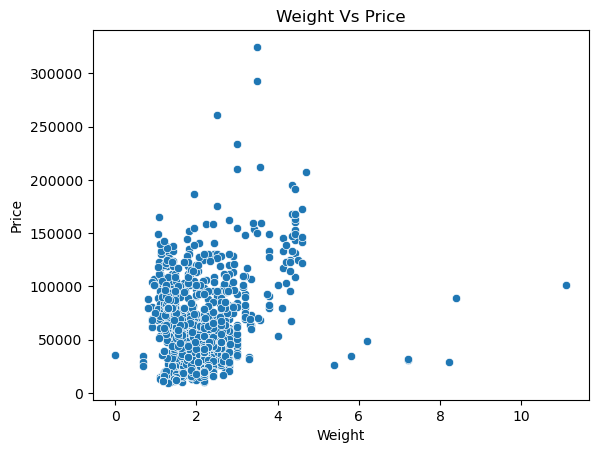

In [43]:
sns.scatterplot(x=df['Weight'],y=df['Price'])
plt.title('Weight Vs Price')
plt.show()

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1273 entries, 0 to 1302
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1273 non-null   object 
 1   TypeName          1273 non-null   object 
 2   Inches            1273 non-null   float64
 3   ScreenResolution  1273 non-null   object 
 4   Cpu               1273 non-null   object 
 5   Ram               1273 non-null   int32  
 6   Memory            1273 non-null   object 
 7   Gpu               1273 non-null   object 
 8   OpSys             1273 non-null   object 
 9   Weight            1273 non-null   float64
 10  Price             1273 non-null   float64
 11  HDD               1273 non-null   int64  
 12  SSD               1273 non-null   int64  
 13  Hybrid            1273 non-null   int64  
 14  Flash_Storage     1273 non-null   int64  
dtypes: float64(3), int32(1), int64(4), object(7)
memory usage: 154.2+ KB


<Axes: xlabel='Price', ylabel='Density'>

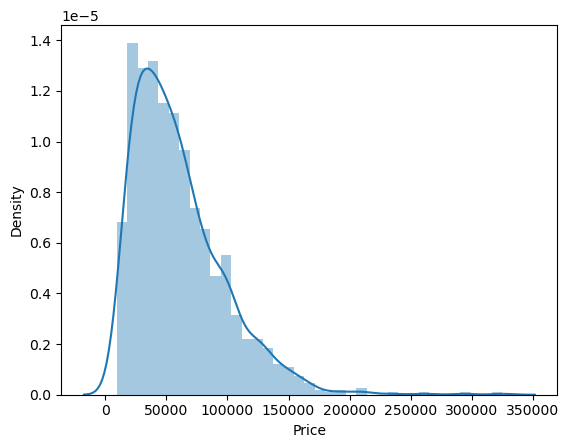

In [45]:
sns.distplot(df['Price'])

# company column

<Axes: xlabel='Company'>

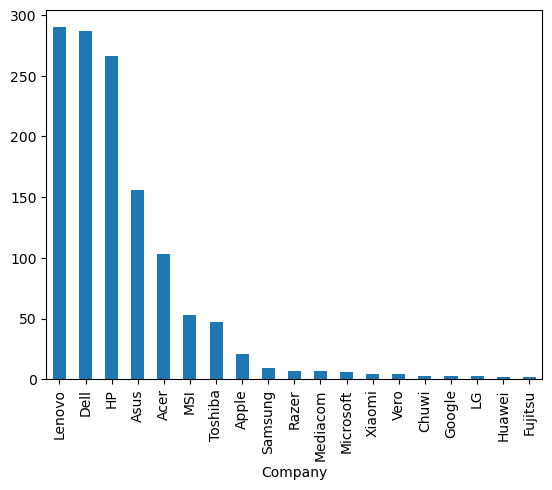

In [46]:
df['Company'].value_counts().plot(kind='bar')


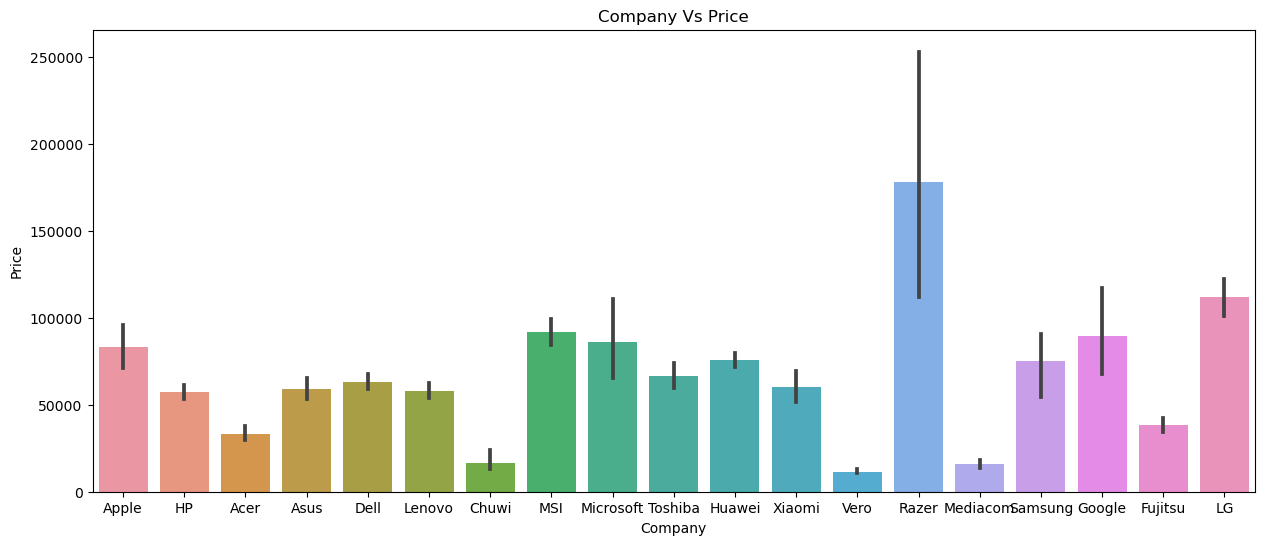

In [47]:
plt.figure(figsize = (15,6))
plot = sns.barplot(x = df['Company'], y= df['Price'])
plt.xticks(rotation = 'vertical')
plt.setp(plot.get_xticklabels(), rotation=0)
plt.title('Company Vs Price')
plt.show()

In [ ]:
# Most of the laptop brands is Razer.

# TypeName column

<Axes: xlabel='TypeName'>

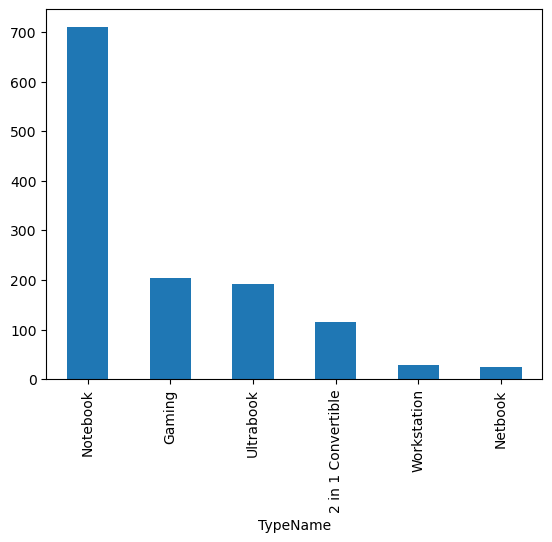

In [48]:
df["TypeName"].value_counts().plot(kind="bar")

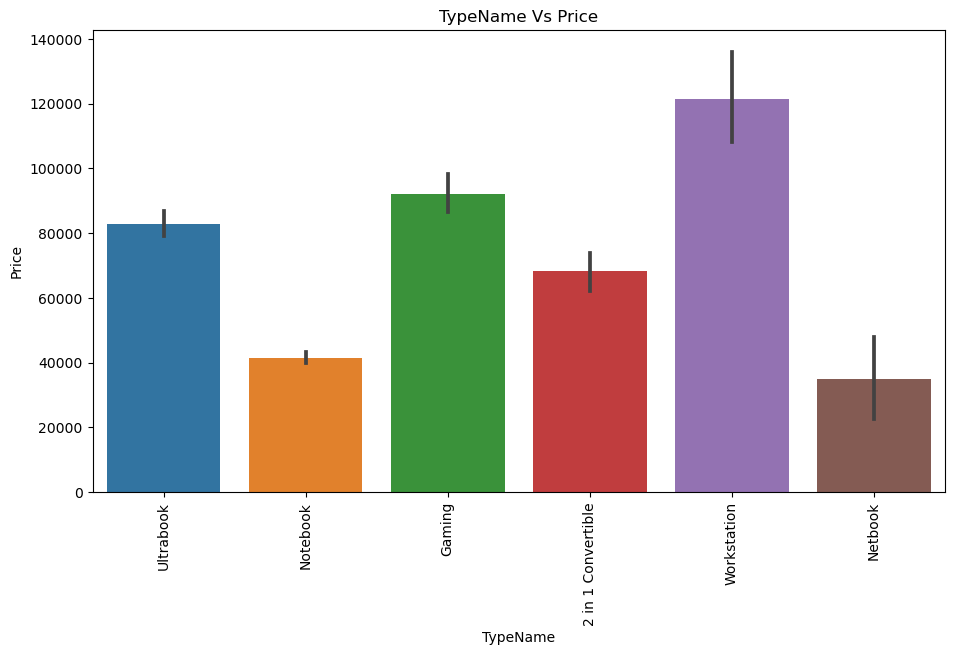

In [55]:
plt.figure(figsize = (11,6))
sns.barplot(x = df['TypeName'], y= df['Price'])
plt.xticks(rotation = 'vertical')
plt.title('TypeName Vs Price')
plt.show()

In [ ]:
# Laptop type Workstation is the most in the data set

In [49]:
df.columns

Index(['Company', 'TypeName', 'Inches', 'ScreenResolution', 'Cpu', 'Ram',
       'Memory', 'Gpu', 'OpSys', 'Weight', 'Price', 'HDD', 'SSD', 'Hybrid',
       'Flash_Storage'],
      dtype='object')

# ScreenResolution column

In [50]:
df["ScreenResolution"].value_counts()

ScreenResolution
Full HD 1920x1080                                495
1366x768                                         274
IPS Panel Full HD 1920x1080                      226
IPS Panel Full HD / Touchscreen 1920x1080         52
Full HD / Touchscreen 1920x1080                   45
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  14
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160                9
4K Ultra HD 3840x2160                              7
IPS Panel 1366x768                                 7
IPS Panel Retina Display 2560x1600                 6
IPS Panel Quad HD+ / Touchscreen 3200x1800         6
Touchscreen 2560x1440                              6
IPS Panel Retina Display 2304x1440                 6
Touchscreen 2256x1504                              6
IPS Panel Touchscreen 2560x14

In [ ]:
# Fetching touchscreen data from screenresolution column

In [51]:
df['Touchscreen'] = df['ScreenResolution'].apply(lambda x:1 if 'Touchscreen' in x else 0)

In [52]:
df.sample(10)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,HDD,SSD,Hybrid,Flash_Storage,Touchscreen
276,Dell,Notebook,17.3,Full HD 1920x1080,Intel Core i7 8550U 1.8GHz,8,128 SSD + 1000 HDD,AMD Radeon 530,Linux,2.80,58554.7200,1000,128,0,0,0
1233,MSI,Gaming,17.3,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16,256 SSD + 1000 HDD,Nvidia GeForce GTX 1060,Windows 10,2.70,85141.4400,1000,256,0,0,0
853,Lenovo,Ultrabook,14.0,IPS Panel Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,8,256 SSD,Nvidia GeForce GT 940MX,Windows 10,1.96,101391.8400,0,256,0,0,0
325,Lenovo,Notebook,14.0,1366x768,Intel Celeron Dual Core N3350 1.1GHz,4,32 Flash Storage,Intel HD Graphics 500,Windows 10,1.44,15557.7600,0,0,0,32,0
163,Lenovo,Gaming,15.6,IPS Panel Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16,256 SSD,Nvidia GeForce GTX 1050 Ti,Windows 10,2.50,57489.1200,0,256,0,0,0
1100,Dell,Ultrabook,12.5,1366x768,Intel Core i3 6100U 2.3GHz,4,500 HDD,Intel HD Graphics 520,Windows 7,1.50,60480.7920,500,0,0,0,0
1280,HP,Notebook,15.6,Full HD 1920x1080,AMD A9-Series 9410 2.9GHz,6,1000 Hybrid,AMD Radeon R7 M440,Windows 10,2.04,29303.4672,0,0,1000,0,0
858,Dell,Notebook,13.3,Full HD / Touchscreen 1920x1080,Intel Core i5 6200U 2.3GHz,8,1000 HDD,Intel HD Graphics 520,Windows 10,1.62,34578.7200,1000,0,0,0,1
773,Dell,Gaming,15.6,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,8,1000 HDD,Nvidia GeForce GTX 1050,Windows 10,2.62,58554.7200,1000,0,0,0,0
800,HP,Workstation,15.6,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,8,256 SSD,Nvidia Quadro M2200,Windows 10,3.14,110017.8720,0,256,0,0,0


<Axes: xlabel='Touchscreen'>

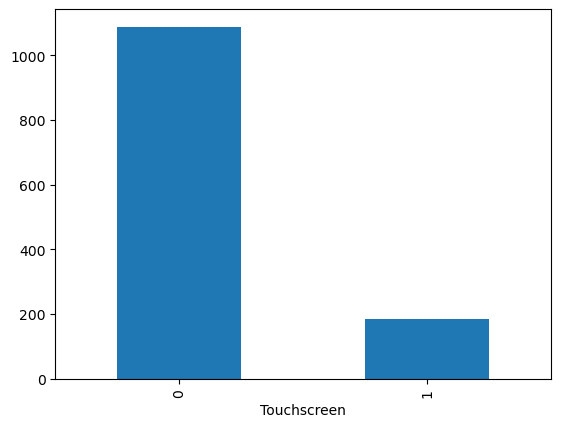

In [53]:
df['Touchscreen'].value_counts().plot(kind='bar')

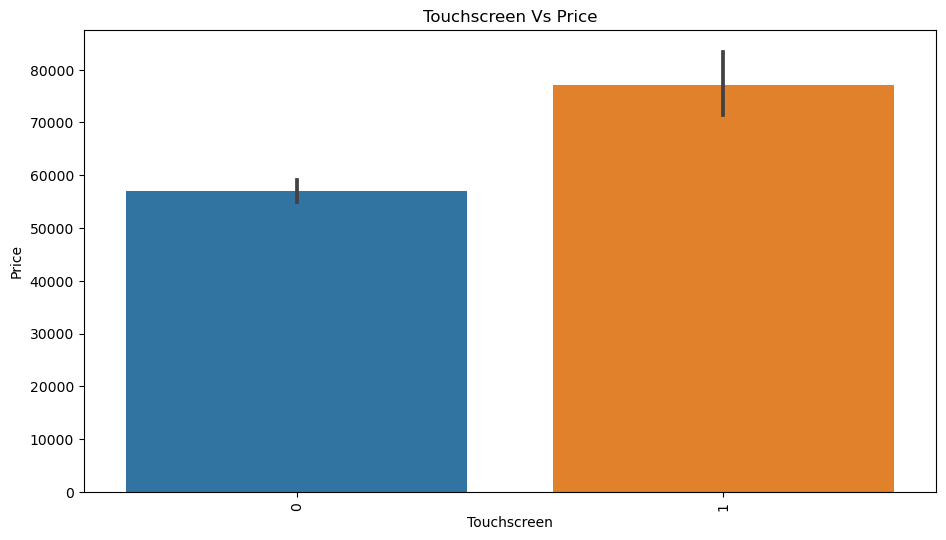

In [54]:

plt.figure(figsize = (11,6))
sns.barplot(x=df['Touchscreen'],y=df['Price'])
plt.xticks(rotation = 'vertical')
plt.title('Touchscreen Vs Price')
plt.show()


In [ ]:
#Touchscreen laptops are most in dataset

In [ ]:
# Fetching if Ips pannel is present in Screenresolution and storing it in new column

In [55]:
df['Ips'] = df['ScreenResolution'].apply(lambda x:1 if 'IPS' in x else 0)

<Axes: xlabel='Ips'>

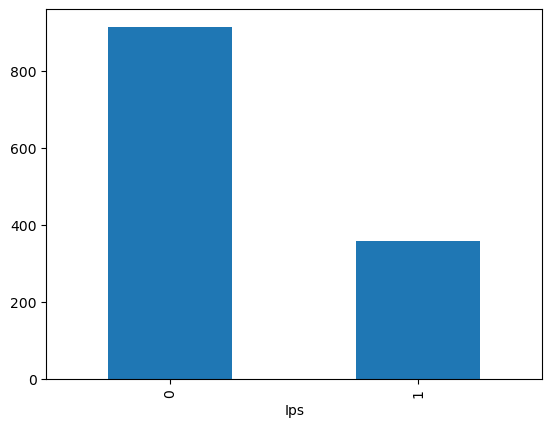

In [56]:
df['Ips'].value_counts().plot(kind='bar')

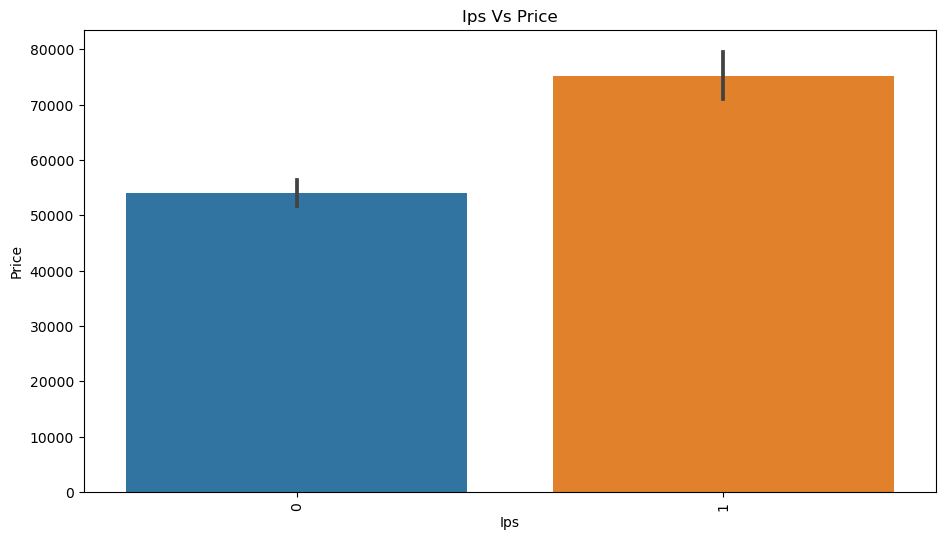

In [57]:

plt.figure(figsize = (11,6))
sns.barplot(x=df['Ips'],y=df['Price'])
plt.xticks(rotation = 'vertical')
plt.title('Ips Vs Price')
plt.show()

In [ ]:
#  IPs panel laptops are most in dataset

In [58]:
new = df['ScreenResolution'].str.split('x',n=1,expand=True)

In [59]:
df['X_res'] = new[0]
df['Y_res'] = new[1]

In [60]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,HDD,SSD,Hybrid,Flash_Storage,Touchscreen,Ips,X_res,Y_res
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,128,0,0,0,1,IPS Panel Retina Display 2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,0,128,0,0,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256 SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,256,0,0,0,0,Full HD 1920,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,512,0,0,0,1,IPS Panel Retina Display 2880,1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,256,0,0,0,1,IPS Panel Retina Display 2560,1600


In [61]:
df['X_res'] = df['X_res'].str.replace(',','').str.findall(r'(\d+\.?\d+)').apply(lambda x:x[0])

In [62]:
df['X_res'] = df['X_res'].astype('int')
df['Y_res'] = df['Y_res'].astype('int')

In [63]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,HDD,SSD,Hybrid,Flash_Storage,Touchscreen,Ips,X_res,Y_res
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,128,0,0,0,1,2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,0,128,0,0,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256 SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,256,0,0,0,0,1920,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,512,0,0,0,1,2880,1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,256,0,0,0,1,2560,1600


In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1273 entries, 0 to 1302
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1273 non-null   object 
 1   TypeName          1273 non-null   object 
 2   Inches            1273 non-null   float64
 3   ScreenResolution  1273 non-null   object 
 4   Cpu               1273 non-null   object 
 5   Ram               1273 non-null   int32  
 6   Memory            1273 non-null   object 
 7   Gpu               1273 non-null   object 
 8   OpSys             1273 non-null   object 
 9   Weight            1273 non-null   float64
 10  Price             1273 non-null   float64
 11  HDD               1273 non-null   int64  
 12  SSD               1273 non-null   int64  
 13  Hybrid            1273 non-null   int64  
 14  Flash_Storage     1273 non-null   int64  
 15  Touchscreen       1273 non-null   int64  
 16  Ips               1273 non-null   int64  
 17  

In [65]:
df['pixel_per_inch'] = (((df['X_res']**2) + (df['Y_res']**2))**0.5/df['Inches']).astype('float')

In [66]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,HDD,SSD,Hybrid,Flash_Storage,Touchscreen,Ips,X_res,Y_res,pixel_per_inch
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,128,0,0,0,1,2560,1600,226.983005
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,0,128,0,0,1440,900,127.677940
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256 SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,256,0,0,0,0,1920,1080,141.211998
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,512,0,0,0,1,2880,1800,220.534624
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,256,0,0,0,1,2560,1600,226.983005


In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1273 entries, 0 to 1302
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1273 non-null   object 
 1   TypeName          1273 non-null   object 
 2   Inches            1273 non-null   float64
 3   ScreenResolution  1273 non-null   object 
 4   Cpu               1273 non-null   object 
 5   Ram               1273 non-null   int32  
 6   Memory            1273 non-null   object 
 7   Gpu               1273 non-null   object 
 8   OpSys             1273 non-null   object 
 9   Weight            1273 non-null   float64
 10  Price             1273 non-null   float64
 11  HDD               1273 non-null   int64  
 12  SSD               1273 non-null   int64  
 13  Hybrid            1273 non-null   int64  
 14  Flash_Storage     1273 non-null   int64  
 15  Touchscreen       1273 non-null   int64  
 16  Ips               1273 non-null   int64  
 17  

# Cpu column

In [68]:
df['Cpu'].value_counts()

Cpu
Intel Core i5 7200U 2.5GHz     183
Intel Core i7 7700HQ 2.8GHz    142
Intel Core i7 7500U 2.7GHz     128
Intel Core i7 8550U 1.8GHz      72
Intel Core i5 8250U 1.6GHz      68
                              ... 
AMD A9-Series 9420 2.9GHz        1
Intel Core i7 2.2GHz             1
AMD A6-Series 7310 2GHz          1
Intel Atom Z8350 1.92GHz         1
AMD E-Series 9000e 1.5GHz        1
Name: count, Length: 118, dtype: int64

In [69]:
df['Cpu Name'] = df['Cpu'].apply(lambda x:" ".join(x.split()[0:3]))

In [70]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,...,HDD,SSD,Hybrid,Flash_Storage,Touchscreen,Ips,X_res,Y_res,pixel_per_inch,Cpu Name
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,...,0,128,0,0,0,1,2560,1600,226.983005,Intel Core i5
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,...,0,0,0,128,0,0,1440,900,127.677940,Intel Core i5
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256 SSD,Intel HD Graphics 620,No OS,1.86,...,0,256,0,0,0,0,1920,1080,141.211998,Intel Core i5
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,...,0,512,0,0,0,1,2880,1800,220.534624,Intel Core i7
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,...,0,256,0,0,0,1,2560,1600,226.983005,Intel Core i5


In [71]:
def fetch_processor(text):
    if text == 'Intel Core i7' or text == 'Intel Core i5' or text == 'Intel Core i3':
        return text
    else:
        if text.split()[0] == 'Intel':
            return 'Other Intel Processor'
        else:
            return 'AMD Processor'

In [72]:
df['Cpu brand'] = df['Cpu Name'].apply(fetch_processor)

In [73]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,...,SSD,Hybrid,Flash_Storage,Touchscreen,Ips,X_res,Y_res,pixel_per_inch,Cpu Name,Cpu brand
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,...,128,0,0,0,1,2560,1600,226.983005,Intel Core i5,Intel Core i5
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,...,0,0,128,0,0,1440,900,127.677940,Intel Core i5,Intel Core i5
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256 SSD,Intel HD Graphics 620,No OS,1.86,...,256,0,0,0,0,1920,1080,141.211998,Intel Core i5,Intel Core i5
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,...,512,0,0,0,1,2880,1800,220.534624,Intel Core i7,Intel Core i7
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,...,256,0,0,0,1,2560,1600,226.983005,Intel Core i5,Intel Core i5


In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1273 entries, 0 to 1302
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1273 non-null   object 
 1   TypeName          1273 non-null   object 
 2   Inches            1273 non-null   float64
 3   ScreenResolution  1273 non-null   object 
 4   Cpu               1273 non-null   object 
 5   Ram               1273 non-null   int32  
 6   Memory            1273 non-null   object 
 7   Gpu               1273 non-null   object 
 8   OpSys             1273 non-null   object 
 9   Weight            1273 non-null   float64
 10  Price             1273 non-null   float64
 11  HDD               1273 non-null   int64  
 12  SSD               1273 non-null   int64  
 13  Hybrid            1273 non-null   int64  
 14  Flash_Storage     1273 non-null   int64  
 15  Touchscreen       1273 non-null   int64  
 16  Ips               1273 non-null   int64  
 17  

<Axes: xlabel='Cpu brand'>

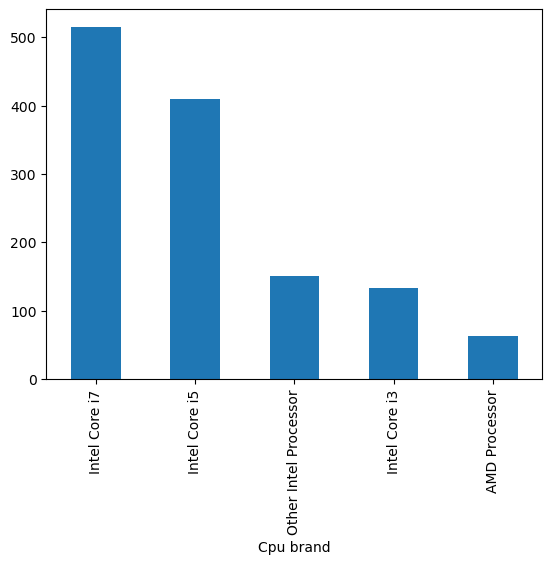

In [75]:
df['Cpu brand'].value_counts().plot(kind='bar')

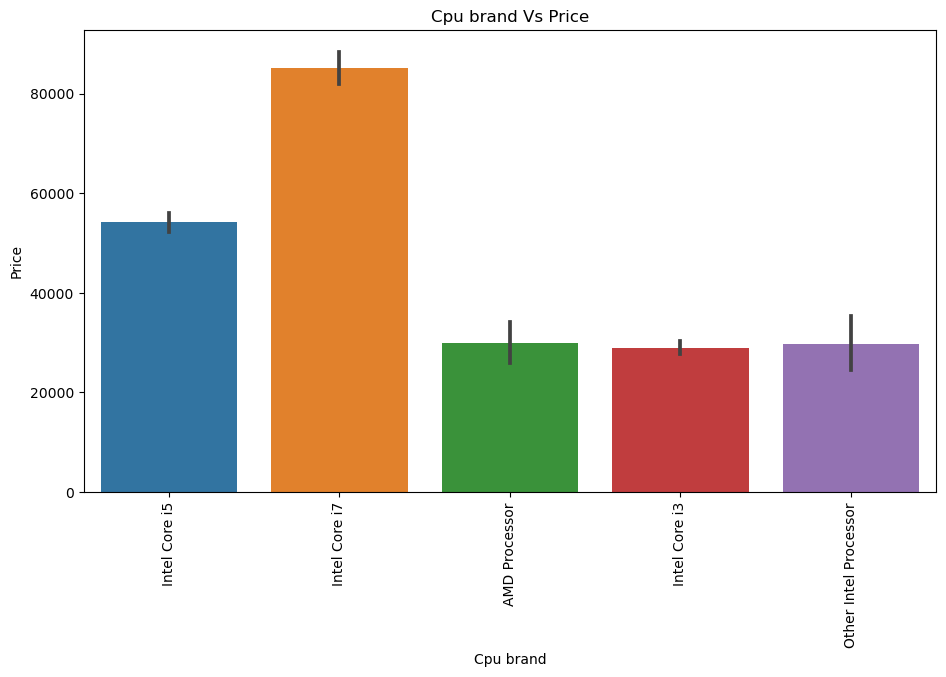

In [76]:
plt.figure(figsize = (11,6))
sns.barplot(x=df['Cpu brand'],y=df['Price'])
plt.xticks(rotation = 'vertical')
plt.title('Cpu brand Vs Price')
plt.show()

In [ ]:
#Cpu brand Intel i7 and i5 are the most in the dataset
# Pocessor Intel i7 are costly than all others.

In [77]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,...,SSD,Hybrid,Flash_Storage,Touchscreen,Ips,X_res,Y_res,pixel_per_inch,Cpu Name,Cpu brand
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,...,128,0,0,0,1,2560,1600,226.983005,Intel Core i5,Intel Core i5
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,...,0,0,128,0,0,1440,900,127.677940,Intel Core i5,Intel Core i5
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256 SSD,Intel HD Graphics 620,No OS,1.86,...,256,0,0,0,0,1920,1080,141.211998,Intel Core i5,Intel Core i5
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,...,512,0,0,0,1,2880,1800,220.534624,Intel Core i7,Intel Core i7
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,...,256,0,0,0,1,2560,1600,226.983005,Intel Core i5,Intel Core i5


# Gpu column

In [78]:
df["Gpu"].value_counts()

Gpu
Intel HD Graphics 620      271
Intel HD Graphics 520      181
Intel UHD Graphics 620      66
Nvidia GeForce GTX 1050     64
Nvidia GeForce GTX 1060     48
                          ... 
AMD Radeon R5 520            1
AMD Radeon R7                1
Intel HD Graphics 540        1
AMD Radeon 540               1
ARM Mali T860 MP4            1
Name: count, Length: 110, dtype: int64

In [79]:
df['Gpu brand'] = df['Gpu'].apply(lambda x:x.split()[0])

In [80]:
df['Gpu brand'].value_counts()

Gpu brand
Intel     703
Nvidia    393
AMD       176
ARM         1
Name: count, dtype: int64

In [81]:
df = df[df['Gpu brand'] != 'ARM']

In [82]:
df['Gpu brand'].value_counts()

Gpu brand
Intel     703
Nvidia    393
AMD       176
Name: count, dtype: int64

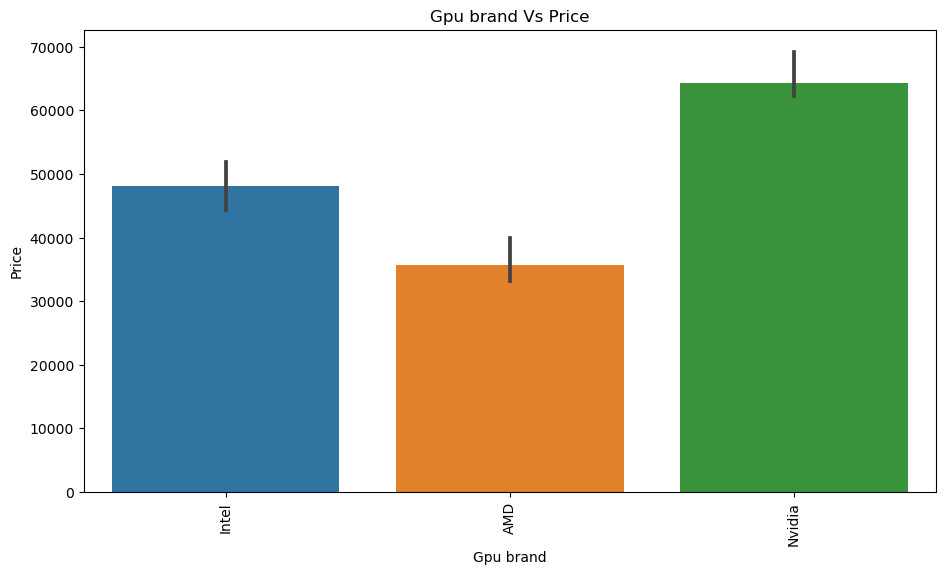

In [83]:
plt.figure(figsize = (11,6))
sns.barplot(x=df['Gpu brand'],y=df['Price'],estimator=np.median)
plt.xticks(rotation = 'vertical')
plt.title('Gpu brand Vs Price')
plt.show()

In [ ]:
# Gpu brand Nvidia  is  the most in the dataset

In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1272 entries, 0 to 1302
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1272 non-null   object 
 1   TypeName          1272 non-null   object 
 2   Inches            1272 non-null   float64
 3   ScreenResolution  1272 non-null   object 
 4   Cpu               1272 non-null   object 
 5   Ram               1272 non-null   int32  
 6   Memory            1272 non-null   object 
 7   Gpu               1272 non-null   object 
 8   OpSys             1272 non-null   object 
 9   Weight            1272 non-null   float64
 10  Price             1272 non-null   float64
 11  HDD               1272 non-null   int64  
 12  SSD               1272 non-null   int64  
 13  Hybrid            1272 non-null   int64  
 14  Flash_Storage     1272 non-null   int64  
 15  Touchscreen       1272 non-null   int64  
 16  Ips               1272 non-null   int64  
 17  

# operating systems column

In [85]:
df['OpSys'].value_counts()

OpSys
Windows 10      1047
No OS             63
Linux             61
Windows 7         45
Chrome OS         26
macOS             13
Mac OS X           8
Windows 10 S       8
Android            1
Name: count, dtype: int64

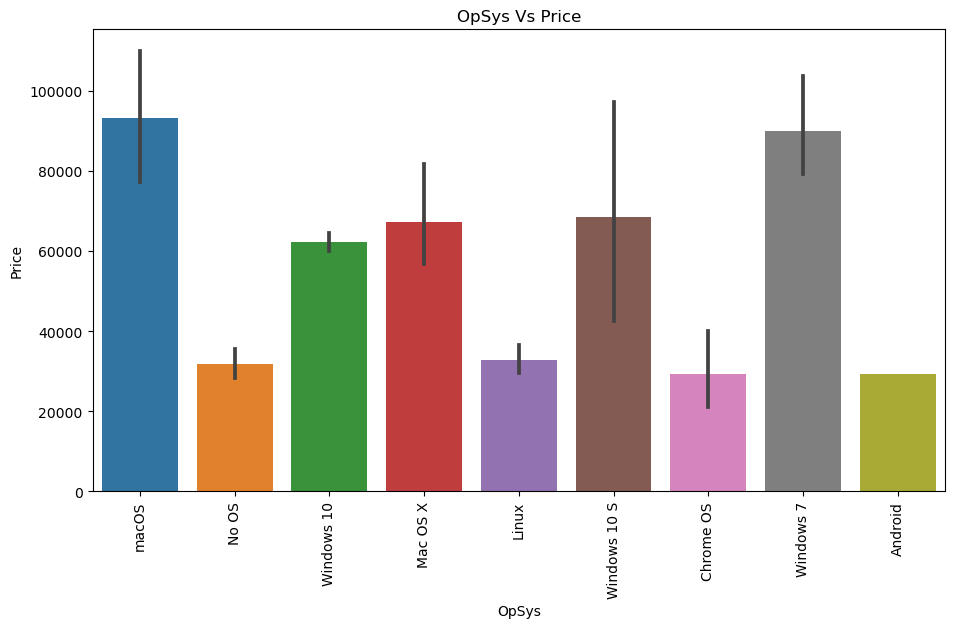

In [86]:
plt.figure(figsize = (11,6))
sns.barplot(x=df['OpSys'],y=df['Price'])
plt.xticks(rotation = 'vertical')
plt.title('OpSys Vs Price')
plt.show()

In [87]:
def cat_os(inp):
    if inp == 'Windows 10' or inp == 'Windows 7' or inp == 'Windows 10 S':
        return 'Windows'
    elif inp == 'macOS' or inp == 'Mac OS X':
        return 'Mac'
    else:
        return 'Others/No OS/Linux'

In [88]:
df['os'] = df['OpSys'].apply(cat_os)

In [89]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,...,Flash_Storage,Touchscreen,Ips,X_res,Y_res,pixel_per_inch,Cpu Name,Cpu brand,Gpu brand,os
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,...,0,0,1,2560,1600,226.983005,Intel Core i5,Intel Core i5,Intel,Mac
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,...,128,0,0,1440,900,127.677940,Intel Core i5,Intel Core i5,Intel,Mac
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256 SSD,Intel HD Graphics 620,No OS,1.86,...,0,0,0,1920,1080,141.211998,Intel Core i5,Intel Core i5,Intel,Others/No OS/Linux
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,...,0,0,1,2880,1800,220.534624,Intel Core i7,Intel Core i7,AMD,Mac
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,...,0,0,1,2560,1600,226.983005,Intel Core i5,Intel Core i5,Intel,Mac


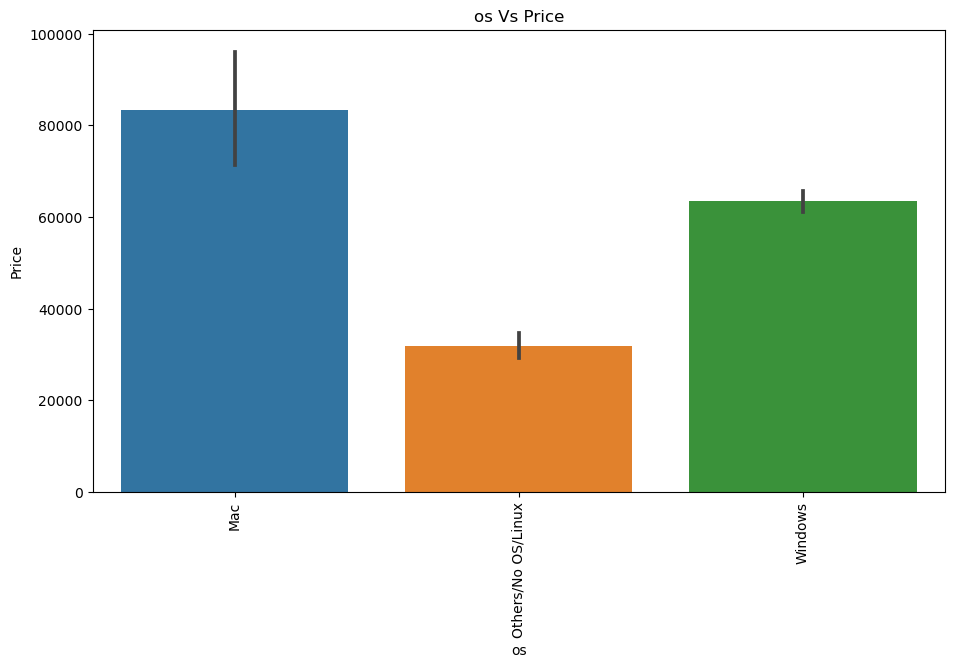

In [90]:
plt.figure(figsize = (11,6))
sns.barplot(x=df['os'],y=df['Price'])
plt.xticks(rotation = 'vertical')
plt.title('os Vs Price')
plt.show()

In [ ]:
# mac os is the most in the dataset and costly than others 

# checking the columns before droping the columns 

In [91]:
df.columns

Index(['Company', 'TypeName', 'Inches', 'ScreenResolution', 'Cpu', 'Ram',
       'Memory', 'Gpu', 'OpSys', 'Weight', 'Price', 'HDD', 'SSD', 'Hybrid',
       'Flash_Storage', 'Touchscreen', 'Ips', 'X_res', 'Y_res',
       'pixel_per_inch', 'Cpu Name', 'Cpu brand', 'Gpu brand', 'os'],
      dtype='object')

In [92]:
df.drop(columns=["Inches","ScreenResolution","Cpu","Gpu","OpSys","Hybrid","Flash_Storage","X_res","Y_res","Cpu Name","Memory"],inplace=True)

In [ ]:
# droping the columns "Inches","ScreenResolution","Cpu","Gpu","OpSys","Hybrid","Flash_Storage","X_res","Y_res","Cpu Name","Memory"

# checking the columns after droping the columns

In [93]:
df.columns

Index(['Company', 'TypeName', 'Ram', 'Weight', 'Price', 'HDD', 'SSD',
       'Touchscreen', 'Ips', 'pixel_per_inch', 'Cpu brand', 'Gpu brand', 'os'],
      dtype='object')

In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1272 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Company         1272 non-null   object 
 1   TypeName        1272 non-null   object 
 2   Ram             1272 non-null   int32  
 3   Weight          1272 non-null   float64
 4   Price           1272 non-null   float64
 5   HDD             1272 non-null   int64  
 6   SSD             1272 non-null   int64  
 7   Touchscreen     1272 non-null   int64  
 8   Ips             1272 non-null   int64  
 9   pixel_per_inch  1272 non-null   float64
 10  Cpu brand       1272 non-null   object 
 11  Gpu brand       1272 non-null   object 
 12  os              1272 non-null   object 
dtypes: float64(3), int32(1), int64(4), object(5)
memory usage: 134.2+ KB


In [95]:
df.head()

,Company,TypeName,Ram,Weight,Price,HDD,SSD,Touchscreen,Ips,pixel_per_inch,Cpu brand,Gpu brand,os
0,Apple,Ultrabook,8,1.37,71378.6832,0,128,0,1,226.983005,Intel Core i5,Intel,Mac
1,Apple,Ultrabook,8,1.34,47895.5232,0,0,0,0,127.677940,Intel Core i5,Intel,Mac
2,HP,Notebook,8,1.86,30636.0000,0,256,0,0,141.211998,Intel Core i5,Intel,Others/No OS/Linux
3,Apple,Ultrabook,16,1.83,135195.3360,0,512,0,1,220.534624,Intel Core i7,AMD,Mac
4,Apple,Ultrabook,8,1.37,96095.8080,0,256,0,1,226.983005,Intel Core i5,Intel,Mac


# checking the numerical columns & categorical columns before encoding

In [96]:
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'object']
cat_features = [feature for feature in df.columns if df[feature].dtype == 'object']
print("Numerical features: ", numeric_features)
print("Categorical featues:", cat_features)

Numerical features:  ['Ram', 'Weight', 'Price', 'HDD', 'SSD', 'Touchscreen', 'Ips', 'pixel_per_inch']
Categorical featues: ['Company', 'TypeName', 'Cpu brand', 'Gpu brand', 'os']


# one hot encoding

In [97]:
df=pd.get_dummies(df,columns=["Company","TypeName","Cpu brand","Gpu brand","os"],drop_first=True, dtype=np.int64)

In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1272 entries, 0 to 1302
Data columns (total 39 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Ram                              1272 non-null   int32  
 1   Weight                           1272 non-null   float64
 2   Price                            1272 non-null   float64
 3   HDD                              1272 non-null   int64  
 4   SSD                              1272 non-null   int64  
 5   Touchscreen                      1272 non-null   int64  
 6   Ips                              1272 non-null   int64  
 7   pixel_per_inch                   1272 non-null   float64
 8   Company_Apple                    1272 non-null   int64  
 9   Company_Asus                     1272 non-null   int64  
 10  Company_Chuwi                    1272 non-null   int64  
 11  Company_Dell                     1272 non-null   int64  
 12  Company_Fujitsu          

In [99]:
df.head()

,Ram,Weight,Price,HDD,SSD,Touchscreen,Ips,pixel_per_inch,Company_Apple,Company_Asus,...,TypeName_Ultrabook,TypeName_Workstation,Cpu brand_Intel Core i3,Cpu brand_Intel Core i5,Cpu brand_Intel Core i7,Cpu brand_Other Intel Processor,Gpu brand_Intel,Gpu brand_Nvidia,os_Others/No OS/Linux,os_Windows
0,8,1.37,71378.6832,0,128,0,1,226.983005,1,0,...,1,0,0,1,0,0,1,0,0,0
1,8,1.34,47895.5232,0,0,0,0,127.677940,1,0,...,1,0,0,1,0,0,1,0,0,0
2,8,1.86,30636.0000,0,256,0,0,141.211998,0,0,...,0,0,0,1,0,0,1,0,1,0
3,16,1.83,135195.3360,0,512,0,1,220.534624,1,0,...,1,0,0,0,1,0,0,0,0,0
4,8,1.37,96095.8080,0,256,0,1,226.983005,1,0,...,1,0,0,1,0,0,1,0,0,0


# correlation blw the features and the price

In [100]:
df.corr()['Price']

Ram                                0.685521
Weight                             0.175194
Price                              1.000000
HDD                               -0.095855
SSD                                0.668271
Touchscreen                        0.190738
Ips                                0.255987
pixel_per_inch                     0.470554
Company_Apple                      0.081104
Company_Asus                      -0.010046
Company_Chuwi                     -0.056312
Company_Dell                       0.047169
Company_Fujitsu                   -0.022753
Company_Google                     0.038311
Company_HP                        -0.038036
Company_Huawei                     0.016900
Company_LG                         0.067554
Company_Lenovo                    -0.027704
Company_MSI                        0.177865
Company_Mediacom                  -0.088203
Company_Microsoft                  0.047822
Company_Razer                      0.235780
Company_Samsung                 

In [ ]:
#price column ( target variable)

<Axes: xlabel='Price', ylabel='Density'>

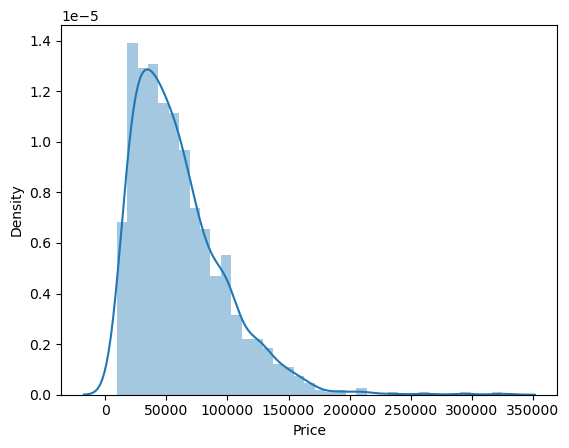

In [101]:
sns.distplot(df['Price'])

# Normalizing the price using log 

<Axes: xlabel='Price', ylabel='Density'>

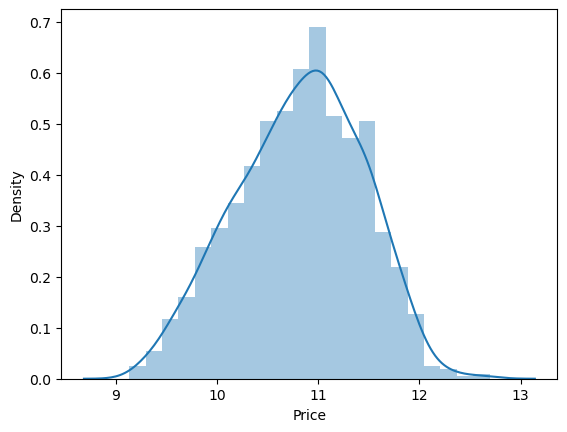

In [102]:
sns.distplot(np.log(df['Price']))

In [103]:
X = df.drop(columns=['Price'])
y = np.log(df['Price'])

In [104]:
X

,Ram,Weight,HDD,SSD,Touchscreen,Ips,pixel_per_inch,Company_Apple,Company_Asus,Company_Chuwi,...,TypeName_Ultrabook,TypeName_Workstation,Cpu brand_Intel Core i3,Cpu brand_Intel Core i5,Cpu brand_Intel Core i7,Cpu brand_Other Intel Processor,Gpu brand_Intel,Gpu brand_Nvidia,os_Others/No OS/Linux,os_Windows
0,8,1.37,0,128,0,1,226.983005,1,0,0,...,1,0,0,1,0,0,1,0,0,0
1,8,1.34,0,0,0,0,127.677940,1,0,0,...,1,0,0,1,0,0,1,0,0,0
2,8,1.86,0,256,0,0,141.211998,0,0,0,...,0,0,0,1,0,0,1,0,1,0
3,16,1.83,0,512,0,1,220.534624,1,0,0,...,1,0,0,0,1,0,0,0,0,0
4,8,1.37,0,256,0,1,226.983005,1,0,0,...,1,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,4,1.80,0,128,1,1,157.350512,0,0,0,...,0,0,0,0,1,0,1,0,0,1
1299,16,1.30,0,512,1,1,276.053530,0,0,0,...,0,0,0,0,1,0,1,0,0,1
1300,2,1.50,0,0,0,0,111.935204,0,0,0,...,0,0,0,0,0,1,1,0,0,1
1301,6,2.19,1000,0,0,0,100.454670,0,0,0,...,0,0,0,0,1,0,0,0,0,1


In [105]:
y

0       11.175755
1       10.776777
2       10.329931
3       11.814476
4       11.473101
          ...    
1298    10.433899
1299    11.288115
1300     9.409283
1301    10.614129
1302     9.886358
Name: Price, Length: 1272, dtype: float64

# Spliting the dataset

In [106]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [107]:
x_train

,Ram,Weight,HDD,SSD,Touchscreen,Ips,pixel_per_inch,Company_Apple,Company_Asus,Company_Chuwi,...,TypeName_Ultrabook,TypeName_Workstation,Cpu brand_Intel Core i3,Cpu brand_Intel Core i5,Cpu brand_Intel Core i7,Cpu brand_Other Intel Processor,Gpu brand_Intel,Gpu brand_Nvidia,os_Others/No OS/Linux,os_Windows
965,4,2.25,1000,0,0,0,100.454670,0,0,0,...,0,0,1,0,0,0,0,0,1,0
10,4,1.86,500,0,0,0,100.454670,0,0,0,...,0,0,0,1,0,0,1,0,1,0
806,4,2.10,500,0,0,0,100.454670,0,0,0,...,0,0,0,1,0,0,1,0,0,1
1142,8,1.48,0,256,1,0,165.632118,0,0,0,...,0,0,0,1,0,0,1,0,0,1
493,8,2.20,1000,0,0,0,100.454670,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785,16,1.60,1000,256,0,1,157.350512,0,0,0,...,0,0,0,0,1,0,0,1,0,1
857,8,1.28,0,256,1,0,165.632118,0,0,0,...,0,0,0,0,1,0,1,0,0,1
1247,16,2.34,1000,256,0,1,141.211998,0,1,0,...,0,0,0,0,1,0,0,1,0,1
572,6,1.95,0,256,0,1,141.211998,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [108]:
y_train

965     10.118931
10       9.951658
806     10.634855
1142    11.371283
493     10.336864
          ...    
785     11.520422
857     11.822933
1247    11.727036
572     10.450994
702     10.037018
Name: Price, Length: 1017, dtype: float64

# Feature Scaling

In [109]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

# Model Development

# LinearRegression

In [110]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [111]:
y_pred=lr.predict(x_test)

In [112]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
print('R2 score',r2_score(y_test,y_pred))
print('MSE',mean_squared_error(y_test,y_pred))

R2 score 0.839122859949261
MSE 0.0674043412282387


# KNeighborsRegressor

In [113]:
from sklearn.neighbors import KNeighborsRegressor
knn=KNeighborsRegressor()
knn.fit(x_train,y_train)

KNeighborsRegressor()

In [114]:
y_pred=knn.predict(x_test)

In [115]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
print('R2 score',r2_score(y_test,y_pred))
print('MSE',mean_squared_error(y_test,y_pred))

R2 score 0.8287305880737474
MSE 0.07175849769455091


# DecisionTree

In [116]:
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor()
dt.fit(x_train,y_train)

DecisionTreeRegressor()

In [117]:
y_pred=dt.predict(x_test)

In [118]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
print('R2 score',r2_score(y_test,y_pred))
print('MSE',mean_squared_error(y_test,y_pred))

R2 score 0.8011646790534034
MSE 0.0833080686111388


# RandomForest

In [119]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
rf.fit(x_train,y_train)

RandomForestRegressor()

In [120]:
y_pred=rf.predict(x_test)

In [121]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
print('R2 score',r2_score(y_test,y_pred))
print('MSE',mean_squared_error(y_test,y_pred))

R2 score 0.9043102386263911
MSE 0.04009211828132469


# XGBRegressor

In [122]:
%%capture
pip install xgboost


In [124]:
from xgboost import XGBRegressor
xgb=XGBRegressor()
xgb.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [125]:
y_pred=rf.predict(x_test)

In [126]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
print('R2 score',r2_score(y_test,y_pred))
print('MSE',mean_squared_error(y_test,y_pred))

R2 score 0.9043102386263911
MSE 0.04009211828132469


# AdaBoostRegressor

In [127]:
from sklearn.ensemble import AdaBoostRegressor
ada=AdaBoostRegressor()
ada.fit(x_train,y_train)



AdaBoostRegressor()

In [128]:
y_pred=ada.predict(x_test)

In [129]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
print('R2 score',r2_score(y_test,y_pred))
print('MSE',mean_squared_error(y_test,y_pred))

R2 score 0.8393672873145115
MSE 0.067301930994394


# GradientBoostingRegressor

In [139]:
from sklearn.ensemble import GradientBoostingRegressor
gb=GradientBoostingRegressor()
gb.fit(x_train,y_train)



GradientBoostingRegressor()

In [140]:
y_pred=gb.predict(x_test)

In [141]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
print('R2 score',r2_score(y_test,y_pred))
print('MSE',mean_squared_error(y_test,y_pred))

R2 score 0.8786421898088402
MSE 0.0508465232925999


# comparing the scores of all the models in dataframe 

In [142]:
import pandas as pd

# Create a dictionary with model names and their corresponding metrics
model_performance = {
    'Model': [
        'Linear Regression', 
        'KNeighbors Regressor', 
        'Decision Tree Regressor', 
        'Random Forest Regressor', 
        'XGB Regressor', 
        'AdaBoost Regressor', 
        'Gradient Boosting Regressor'
    ],
    'R2 Score': [
        0.8391, 
        0.8287, 
        0.8023, 
        0.9018, 
        0.9018, 
        0.8322, 
        0.8786
    ],
    'MSE': [
        0.0674, 
        0.0718, 
        0.0829, 
        0.0412, 
        0.0412, 
        0.0703, 
        0.0509
    ]
}




# DataFrame

In [143]:
# Convert the dictionary into a DataFrame
performance_df = pd.DataFrame(model_performance)

# Display the DataFrame
print(performance_df)

                         Model  R2 Score     MSE
0            Linear Regression    0.8391  0.0674
1         KNeighbors Regressor    0.8287  0.0718
2      Decision Tree Regressor    0.8023  0.0829
3      Random Forest Regressor    0.9018  0.0412
4                XGB Regressor    0.9018  0.0412
5           AdaBoost Regressor    0.8322  0.0703
6  Gradient Boosting Regressor    0.8786  0.0509


# Hyperparameter Tuning

In [144]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# Define the model
rf_model = RandomForestRegressor(random_state=42)

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Setup GridSearchCV
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid,
                           cv=5, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')

# Fit the model
grid_search.fit(x_train, y_train)

# Get the best parameters and model
best_rf_model = grid_search.best_estimator_
print("Best Parameters: ", grid_search.best_params_)


Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best Parameters:  {'bootstrap': True, 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}


# Evaluation of Tuned Model
# After obtaining the best model

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

# Make predictions on the test set
y_pred = best_rf_model.predict(x_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)



In [160]:
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")


Mean Squared Error: 0.04004044828137548
R^2 Score: 0.9044335618673988


In [ ]:
The MSE value of 0.04004 indicates that, on average, the squared difference between your models predicted laptop prices 
and the actual prices is 0.04004 units.
 A lower MSE generally means better model performance, indicating that the models predictions are close to the actual values.
The R² score of 0.9044 indicates that approximately 90.44% of the variance in laptop prices can be explained by the features included in your model.

# Expected Outcomes

# 1.A reliable machine learning model capable of predicting laptop prices with high accuracy.

In [ ]:
The machine learning model will predict laptop prices with high accuracy, achieving an R² score of 0.903.
This ensures that SmartTech Co. can confidently price its laptops based on key specifications 
like RAM, SSD type, Processor (Intel Core i7), and GPU (Nvidia).

# 2.Insights into the factors influencing laptop prices, empowering SmartTech Co. in market positioning and strategy.

In [ ]:
The model provides clear insights into the factors influencing laptop prices. 
RAM capacity, SSD storage, high-end processors, and GPU brand are the most significant drivers of price. 
These insights will help SmartTech Co. strategically position its products in the market,
focusing on features that customers value the most and understanding how different brands influence pricing. 
This knowledge will guide SmartTech Co. in making informed decisions about product offerings and pricing strategies.

# Questions to Explore

# 1.Which features have the most significant impact on laptop prices?


In [ ]:
The most significant features impacting laptop prices are:

RAM (0.685): Higher RAM capacity strongly correlates with higher prices.
SSD (0.668): Laptops with SSDs tend to be priced higher than those with traditional HDDs.
Processor Type (Intel Core i7) (0.556): Higher-end processors like Intel Core i7 significantly drive up prices.
GPU Brand (Nvidia) (0.345): Laptops with Nvidia GPUs are generally more expensive.

# 2.Can the model accurately predict the prices of laptops from lesser-known brands?

In [ ]:
The model shows moderate performance for lesser-known brands.
Companies like Chuwi (-0.056) and Mediacom (-0.088) have lower correlations with price, 
indicating that the model might struggle with accuracy for these brands compared to well-known ones like MSI (0.178) or Apple (0.081).

# 3.Does the brand of the laptop significantly influence its price?

In [ ]:
Yes, brand significantly influences price. For instance, Apple (0.081) and Razer (0.236) command higher prices, 
whereas brands like Chuwi (-0.056) and Vero (-0.073) are associated with lower prices

# 4.How well does the model perform on laptops with high-end specifications compared to budget laptops?

In [ ]:
here model performs better on high-end laptops. 
Features like Intel Core i7 (0.556) and Nvidia GPUs (0.345), which are typical of high-end laptops, have strong positive correlations with price, 
suggesting that the model predicts these prices accurately. 
Budget laptops with lower-end specifications might see less accurate predictions due to more variability in their pricing.

# 5.What are the limitations and challenges in predicting laptop prices accurately?

In [ ]:
Challenges include:
Underrepresented Brands: Lesser-known brands like Chuwi (-0.056) and Mediacom (-0.088) may lead to less accurate predictions.
OS Variability: Laptops with Other OS/Linux (-0.277) are priced unpredictably, making them harder to predict.
Market Dynamics: The model might not fully capture market factors like sales and discounts, which can influence prices.

# conclusion

# Best Models
Random Forest Regressor and XGB Regressor: 
Both models achieve the highest R² score of 0.9018 and the lowest MSE of 0.0412.
This indicates they perform best in predicting laptop prices with high accuracy and low error.
Other Models
Gradient Boosting Regressor: 
Performs well with an R² score of 0.8786 and MSE of 0.0509.
Linear Regression: 
Shows a strong performance with an R² score of 0.8391, but its MSE (0.0674) is higher compared to the top-performing models.
Less Effective Models
Decision Tree Regressor: 
Has the lowest performance with an R² score of 0.8023 and the highest MSE of 0.0829,
indicating it may not capture the complexities in the data as effectively as the other models.
Model Choice:
The Random Forest Regressor and XGB Regressor are the best choices for predicting laptop prices due to their high accuracy and low error rates.
Feature Insights: 
SSD and RAM are crucial features influencing laptop prices positively. On the other hand, older CPU models and 
non-Windows operating systems are associated with lower prices.